In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
df = pd.read_excel('../data/supermarket_data_clean_min.xlsx', sheet_name="Data")
df.columns

Index(['Order Date', 'Order Date Year Month', 'Order Date Year',
       'Order Date Month', 'Order Date Day', 'Ship Date', 'Ship Date Year',
       'Ship Date Month', 'Ship Date Day', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Postal Code',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [17]:
df2 = df[["Country", "Profit"]]
def condition(value):
    return isinstance(value, (int, float))
df2 = df2[df2["Profit"].map(condition)]
print(df2)

             Country  Profit
0            Algeria  106.14
1            Germany   10.53
2             France   29.88
3     United Kingdom   10.35
4               Peru -25.464
...              ...     ...
2559  United Kingdom   15.96
2560            Iraq    4.02
2561           China    6.84
2562     Netherlands   -9.69
2563       Nicaragua   12.36

[2559 rows x 2 columns]


In [18]:
g1 = df2.groupby("Country").agg({'sum', 'mean', 'max'})
print(g1)

                 Profit                    
                   mean        sum      max
Country                                    
Afghanistan  175.417500     701.67  647.550
Albania      258.900000      258.9  258.900
Algeria       39.384000     393.84  131.910
Angola        12.885000     103.08   49.560
Argentina    -45.817475 -778.89708   38.208
...                 ...        ...      ...
Venezuela     -6.761333    -60.852    8.932
Vietnam       35.734950   571.7592  676.167
Yemen        -65.367000   -130.734  -44.598
Zambia        29.991000     299.91  131.550
Zimbabwe     -41.869800   -209.349   -3.864

[115 rows x 3 columns]


In [19]:
g2 = g1[g1["Profit"]["sum"].map(lambda v: v > 4000)]
print(g2)

                   Profit                       
                     mean         sum        max
Country                                         
Australia       28.487795    4159.218   794.5770
China           98.482371   10340.649  1537.8300
France          37.233286    5473.293   551.9760
Germany         47.250649   4914.0675  1130.3460
India           73.973878     7249.44   541.8000
Mexico          43.257067  5147.59092   574.1400
United Kingdom  59.967648    5277.153   451.0800
United States   24.001863  10776.8363  2400.9657


In [20]:
plt.rcParams['figure.figsize'] = (26, 12)

countries = g2.index.values
values = {
    'sum': g2['Profit']['sum'].values,
    'mean': g2['Profit']['mean'].values,
    'max': g2['Profit']['max'].values,
}

print(countries)
print(values)

['Australia' 'China' 'France' 'Germany' 'India' 'Mexico' 'United Kingdom'
 'United States']
{'sum': array([4159.217999999997, 10340.649000000001, 5473.2930000000015,
       4914.067500000002, 7249.440000000005, 5147.590919999999,
       5277.152999999999, 10776.836299999994], dtype=object), 'mean': array([28.48779452, 98.48237143, 37.23328571, 47.25064904, 73.97387755,
       43.25706655, 59.96764773, 24.00186258]), 'max': array([ 794.577 , 1537.83  ,  551.976 , 1130.346 ,  541.8   ,  574.14  ,
        451.08  , 2400.9657])}


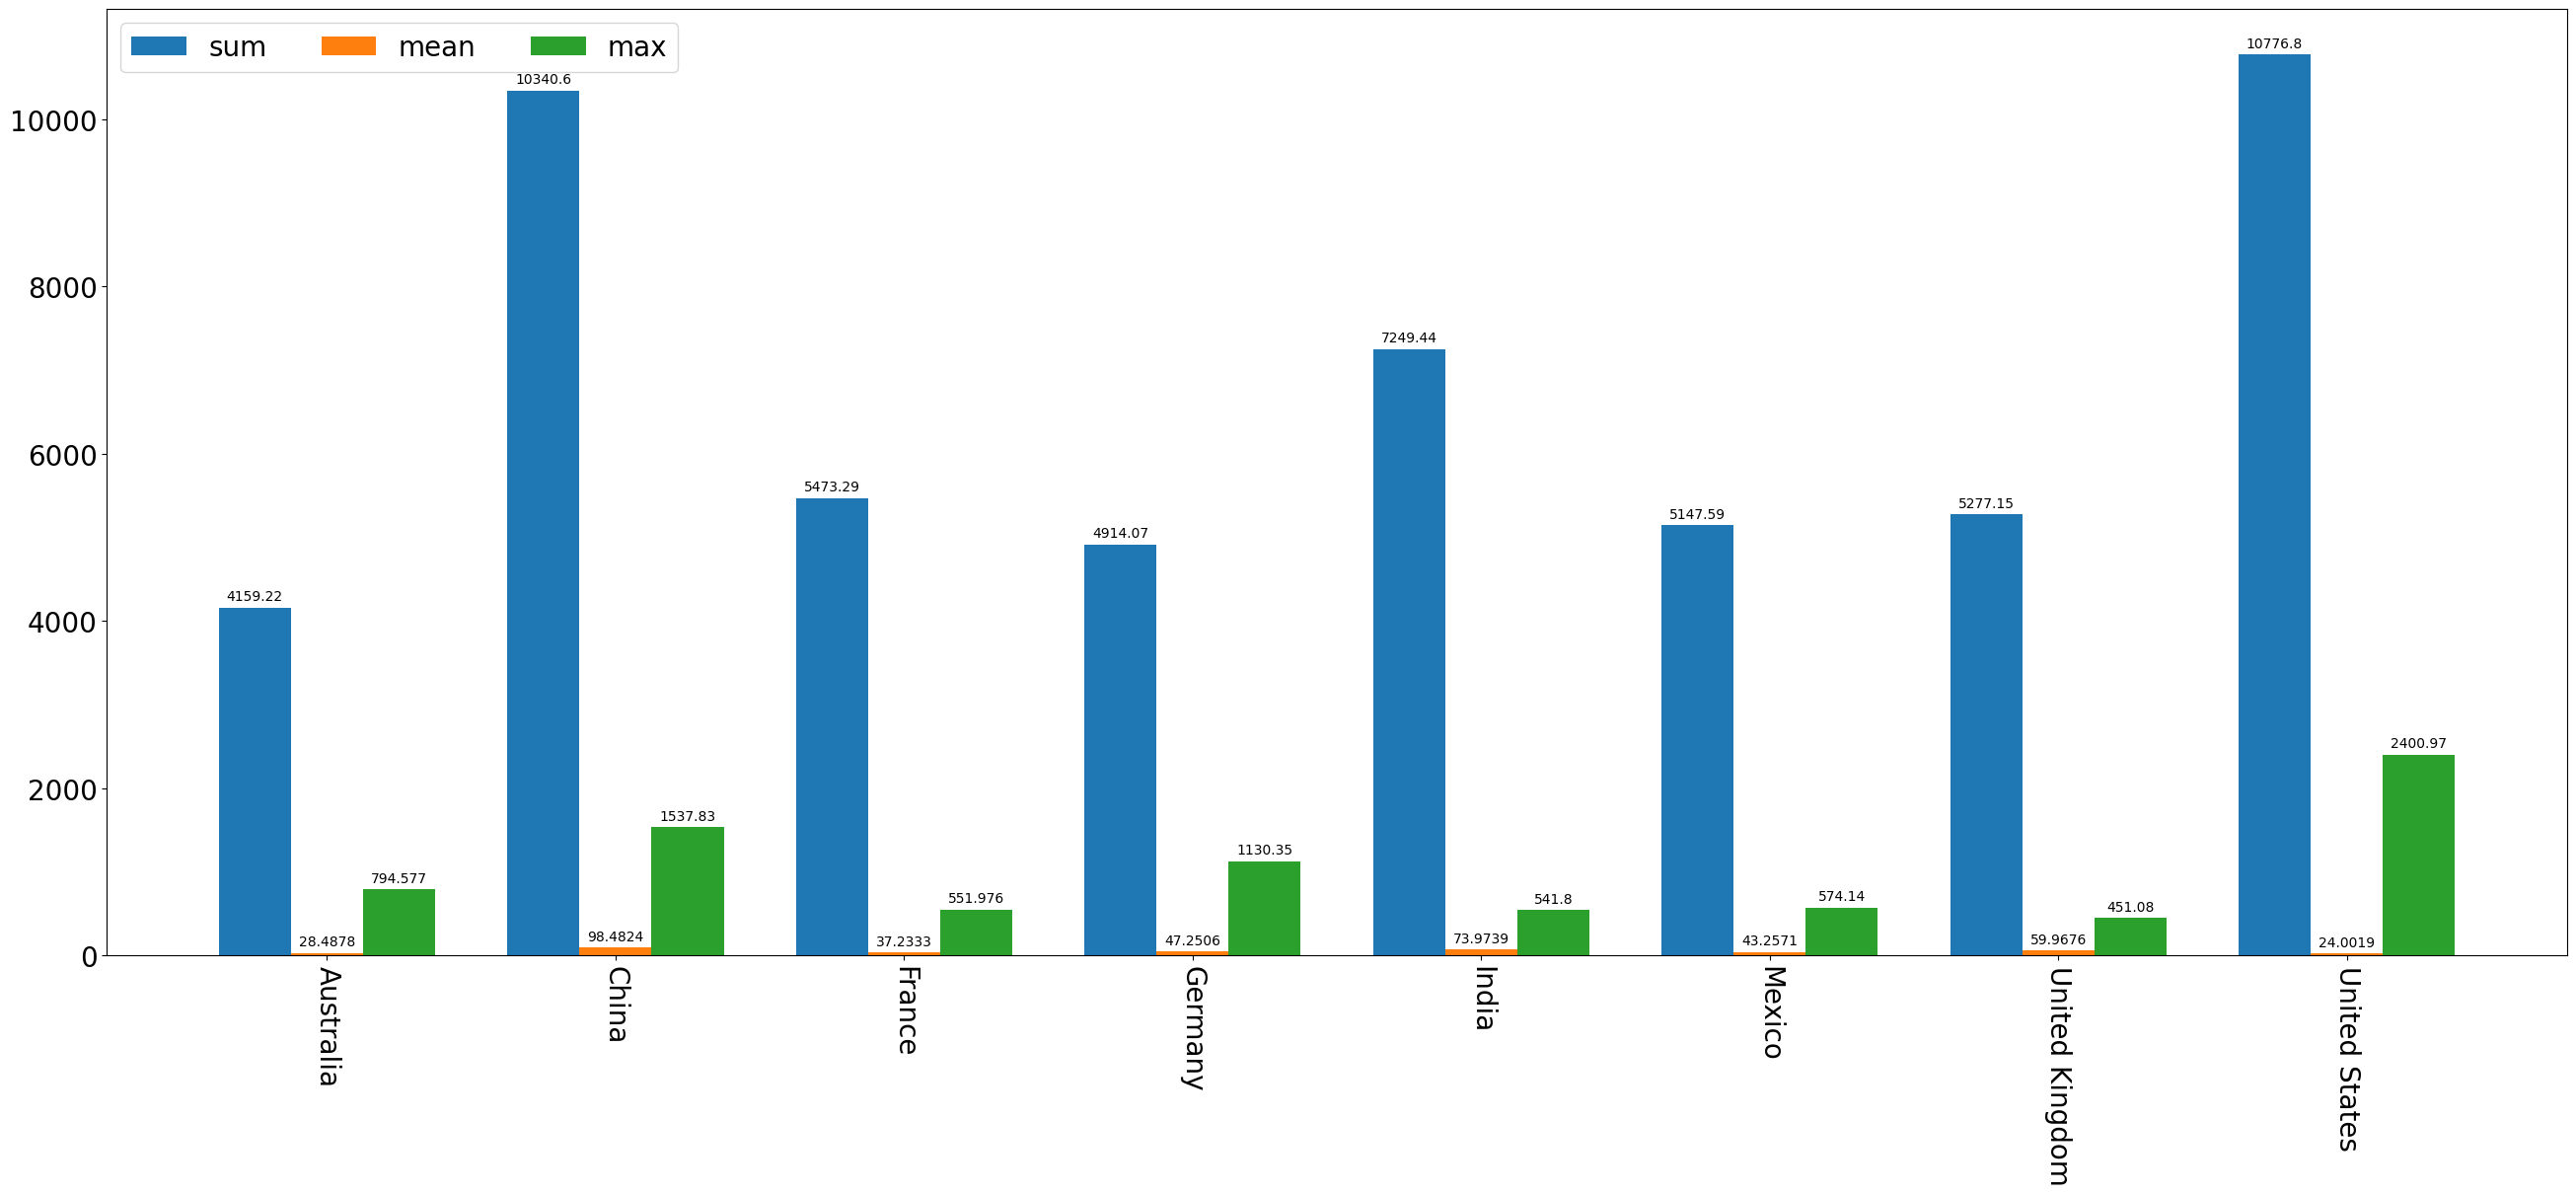

In [21]:
x = np.arange(len(countries))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xticks(x + width, countries)
ax.legend(loc='upper left', ncols=3, fontsize=20)

plt.xticks(rotation=270)
plt.tick_params(labelsize=20)
plt.show()